# Firefly Peak Mating Season
Emily Feuss

## Attempting to find any weather correlations with the predicted or actual peak firefly mating dates or length of mating season.

Using climate data from NOAA obtained from the climate data online search (https://www.ncdc.noaa.gov/cdo-web/search) centered around the weather center in Morristown, TN. Includues other related cities, all about 1.5 miles north, northeast, or northwest from the Elkmont area of the Great Smoky Mountain National Park where the synchronous fireflies put on their annual mating lightshow.

### References for these notes
- Great Smoky Mountain National Park (GSMNP) spans Tennessee and North Carolina
- Elkmont is a campground/area within GSMNP where the firefly display is most concentrated

---

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## First step: importing weather data

In [3]:
daily_summaries = pd.read_csv('Daily Summaries.csv')

In [4]:
# rename df columns based on documentation from noaa
ds = daily_summaries.rename(columns={"WT01": "FOG", "WT03": "THUNDER","WT04": "ICE",
                                     "WT05":"HAIL", "WT06":"GLAZE","WT11":"WIND"})


- **FOG** (WT01): Fog, ice fog, or freezing fog (may include heavy fog)
- **ICE** (WT04):Ice pellets, sleet, snow pellets, or small hail
- **GLAZE** (WT06): Glaze or rime (thick ice coating the exterior of an object)
- **WIND** (WT11): High or damaging winds

In [5]:
# rename df columns based on documentation from noaa
ds = ds.rename(columns={"TOBS": "T_OBS", "WESD": "SNOW_WATER_GROUND","WESF": "SNOW_WATER_FALL"})

- **T_OBS**: Temperature at the time of observation
- **SNOW_WATER_GROUND** (WESD): Water equivalent of snow on the ground
- **SNOW_WATER_FALL** (WESF): Water equivalent of snowfall

## Column Guide
Some columns made sense to keep as they were originally named, but a guide will help with this
- **MDPR** - Multiday precipitation total (use with DAPR and DWPR, if available)
- **DAPR** - Number of days included in the multiday precipitation total (MDPR)

In [10]:
ds['DATE'] = pd.to_datetime(ds['DATE'])

ds['DAY'] = ds['DATE'].dt.day
ds['MONTH'] = ds['DATE'].dt.month
ds['YEAR'] = ds['DATE'].dt.year

In [11]:
ds.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'MDPR', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'T_OBS',
       'SNOW_WATER_GROUND', 'SNOW_WATER_FALL', 'FOG', 'THUNDER', 'ICE', 'HAIL',
       'GLAZE', 'WIND', 'DAY', 'MONTH', 'YEAR'],
      dtype='object')

In [12]:
ds.shape

(70736, 26)

In [13]:
ds.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,...,SNOW_WATER_FALL,FOG,THUNDER,ICE,HAIL,GLAZE,WIND,DAY,MONTH,YEAR
0,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-01,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1992
1,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-02,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1992
2,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-03,NaN,NaN,0.62,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1992
3,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-04,NaN,NaN,0.13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,1992
4,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-05,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1,1992


---
## Second step: importing firefly data

I compiled this data myself, from a mix of National Park Service (NPS) data regarding firefly lottery viewing dates and a paper studying predicting mating dates that shows peak mating dates. Between these two pieces of data, I have firefly dates from **1993 - 2005 & 2014 - 2023**. The event in 2020 was canceled due to COVID-19, but a surmised date range was calculated based on virtual events surrounding the annual show.

The imported data is START and END dates. This is based off the dates the NPS provided. This was related to the above paper by considering GOOD to be the START and PEAK + 1 day to be the END. "Good displays occur when at least 50% of males have emerged." [1] I chose PEAK + 1 day to match with NPS END dates because I assume the lightshow will still be desirable to watch as the peak tapers out.

(Because peak nights can span 2 - 5 days depending on weather conditions, only the final night of maximum
male display was recorded for this study (this date was referred to as “peak display”). [1] but I wanted to try to align this a bit with the extended windows of NPS dates offered to guests).

The year 1999 had a very short window of GOOD to PEAK, so I'm going to definitely explore this with the weather data.

In [15]:
fireflies = pd.read_csv('Firefly Dates 2.csv')

In [16]:
fireflies.head()

,YEAR,START_MONTH,START_DAY,END_MONTH,END_DAY,LENGTH,START_DOY,END_DOY
0,2023,6,4,6,11,8,155,162
1,2022,6,3,6,10,8,154,161
2,2021,6,1,6,8,8,152,159
3,2020,5,30,6,4,6,151,158
4,2019,5,30,6,6,8,150,157


---

## Question: How much snowfall was there November 1998 - April 1999 that might have caused the short 1999 season?
- Let's compare vs. snowfall November 2002 - April 2003 to look at longest season
- Will compare by each month and then total "winter season"

In [350]:
fireflies.query("YEAR == 1999")["LENGTH"]

16    4
Name: LENGTH, dtype: int64

In [351]:
fireflies.query("YEAR == 2003")["LENGTH"]

12    13
Name: LENGTH, dtype: int64

In [91]:
ds_date = ds.sort_values('DATE')

In [118]:
# sourcing nov 1 1998
# ds_date.iloc[6273]

# sourcing march 31 1999
# ds_date.iloc[6635]

# since I wanted to capture the entire winter season, and that spanned from 1998-1999, the best way I could 
# think to do this was to manually sort the data by date and then find the location/row for each date and then
# slice the data by these locations

In [126]:
winter_9899 = ds_date.iloc[6273:6636]

In [128]:
winter_9899['SNOW'].describe()

count    362.000000
mean       0.080939
std        0.536993
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.500000
Name: SNOW, dtype: float64

Text(0, 0.5, 'Snow (in inches)')

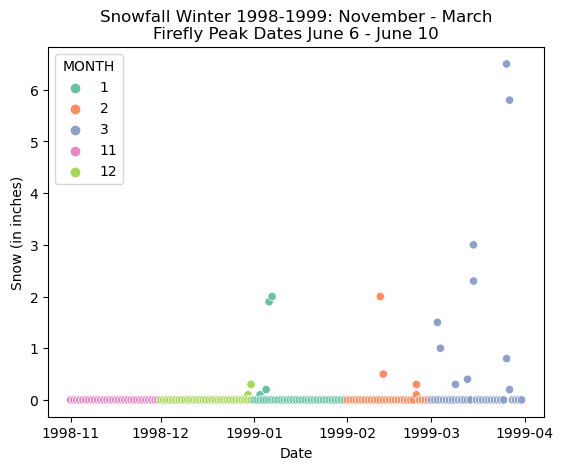

In [418]:
sns.scatterplot(data=winter_9899, x="DATE", y="SNOW", hue="MONTH", palette = "Set2")

plt.title("Snowfall Winter 1998-1999: November - March\nFirefly Peak Dates June 6 - June 10")
plt.xlabel("Date")
plt.ylabel("Snow (in inches)")

In [150]:
# sourcing nov 1 2002
# ds_date.iloc[11205]

# sourcing march 31 2003
# ds_date.iloc[11808]

In [151]:
winter_0203 = ds_date.iloc[11205:11809]

In [153]:
winter_0203['SNOW'].describe()

count    600.000000
mean       0.090167
std        0.536656
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: SNOW, dtype: float64

Text(0, 0.5, 'Snow (in inches)')

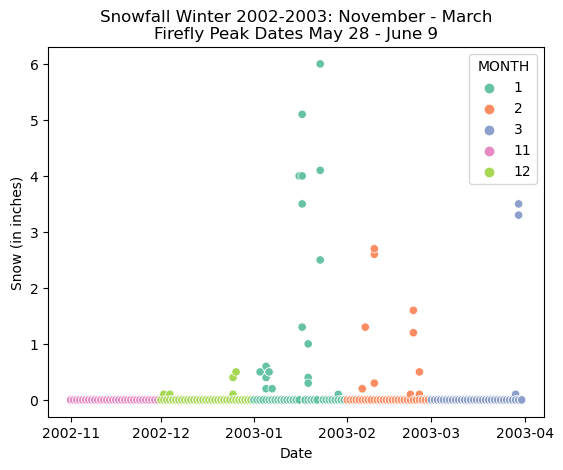

In [419]:
sns.scatterplot(data=winter_0203, x="DATE", y="SNOW", hue="MONTH", palette="Set2")

plt.title("Snowfall Winter 2002-2003: November - March\nFirefly Peak Dates May 28 - June 9")
plt.xlabel("Date")
plt.ylabel("Snow (in inches)")

### The amount of snowfall doesn't seem to be a factor, but we do have snow later in the season in 1999, which might contribute to the shorter season. The pupa stage of fireflies would be about 4 weeks before the peak - early May, so maybe the late season snow affected the late stage development of the fireflies.

### Let's also check temperature ranges of each winter season with TMIN and TMAX.

In [487]:
winter_9899.iloc[:,12:14].describe()

,TMAX,TMIN
count,333.000000,333.000000
mean,55.609610,37.477477
std,11.129204,9.777507
min,23.000000,13.000000
25%,49.000000,30.000000
50%,57.000000,38.000000
75%,65.000000,45.000000
max,76.000000,62.000000


In [486]:
winter_0203.iloc[:,12:14].describe()

,TMAX,TMIN
count,597.000000,599.000000
mean,50.241206,33.058431
std,12.272580,10.578814
min,15.000000,0.000000
25%,41.000000,27.000000
50%,50.000000,33.000000
75%,58.000000,41.000000
max,78.000000,60.000000


In [496]:
winter_9899.groupby("MONTH")[["TMIN","TMAX"]].describe()

TMIN                                                        TMAX  \
      count       mean        std   min    25%   50%    75%   max count   
MONTH                                                                     
1      62.0  34.725806  12.168448  13.0  26.00  35.5  46.00  62.0  62.0   
2      56.0  35.071429   8.895059  17.0  28.00  36.5  41.25  58.0  56.0   
3      62.0  35.629032   7.663484  25.0  30.00  33.0  40.00  53.0  62.0   
11     83.0  41.698795   7.628149  25.0  37.00  42.0  47.00  57.0  83.0   
12     70.0  38.471429  10.389127  20.0  29.25  39.5  46.50  59.0  70.0   

                                                             
            mean        std   min    25%   50%    75%   max  
MONTH                                                        
1      52.306452  12.360154  23.0  44.25  55.0  59.75  76.0  
2      53.250000  10.276628  33.0  48.25  54.0  59.00  75.0  
3      56.112903   8.661399  40.0  50.00  58.0  62.75  72.0  
11     61.204819   7.961430  41.0  57.00  62.0  67.00  76.0  
12     53.342857  13.328498  30.0  43.00  51.0  67.00  74.0

In [497]:
winter_0203.groupby("MONTH")[["TMIN","TMAX"]].describe()

TMIN                                                         TMAX  \
       count       mean        std   min    25%   50%    75%   max  count   
MONTH                                                                       
1      124.0  25.177419  11.112176   0.0  17.00  24.0  34.00  50.0  122.0   
2      112.0  32.241071   8.556380  12.0  28.75  32.0  38.25  49.0  112.0   
3      124.0  41.137097   8.604531  24.0  33.00  42.5  48.00  60.0  124.0   
11     120.0  36.383333   9.051843  18.0  29.00  36.0  43.00  59.0  120.0   
12     119.0  30.268908   7.495419  16.0  25.00  30.0  37.00  44.0  119.0   

                                                            
            mean        std   min   25%   50%    75%   max  
MONTH                                                       
1      39.795082  10.381116  15.0  33.0  39.0  46.75  62.0  
2      46.276786   9.698342  21.0  40.0  45.0  52.00  75.0  
3      63.959677   8.363101  42.0  59.0  65.0  70.00  78.0  
11     53.050000   8.884743  34.0  49.0  53.0  56.00  77.0  
12     47.554622   8.272578  30.0  41.0  48.0  54.00  68.0

Winter temperatures seem to be less of a factor overall, but as we saw with the snowfall, it's probably best to focus our studies around the actual dates of firefly development. Similar to snowfall, we see an average TMIN (minimum temperature) lower in March 1999 at 35.6 degrees in a winter where it got cold in January and stayed cold through March.

In 2002, we see a cold January getting progressively warmer, until we culiminate in a warmer March 2003 at an average TMIN of 41.1 degrees.

### Overall, it might be best to focus in on the months of April, May, and June as fireflies move into pupa and then adult stages. Since insect larva tends to make themselves comfortable and more resilient under ground, it may be at these vulnerable stages where they emerge and thus are more sensitive to the weather.

---

## Question: Our latest "start date" is June 11th in 1993. Let's look at spring rainfall and see if this causes an impact

- Let's compare vs. spring rainfall in 2003, our earliest date at May 28th
- We may also want to consider water equivalent of snowfalls in March

In [372]:
spring93 = ds_date.query('YEAR == 1993')

In [375]:
spring93 = spring93.query('MONTH == [3, 4, 5, 6]')

In [376]:
spring93.shape

(244, 26)

In [199]:
# sourcing march 1 1993
# ds_date.iloc[850]

# sourcing june 30 1993
# ds_date.iloc[1093]

In [200]:
# spring_93 = ds_date.iloc[850:1094]
# I realized because this data was 4 months in the same year, I could mask this data a lot more easily

In [498]:
spring93.shape

(244, 26)

In [499]:
spring93.iloc[:,15:17].describe()

,SNOW_WATER_GROUND,SNOW_WATER_FALL
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


Water content from snow is not a factor, so we can focus just on rain.

In [500]:
spring93['PRCP'].describe()

count    242.000000
mean       0.110909
std        0.280892
min        0.000000
25%        0.000000
50%        0.000000
75%        0.060000
max        2.030000
Name: PRCP, dtype: float64

In [501]:
spring93.groupby("MONTH")['PRCP'].describe()

,count,mean,std,min,25%,50%,75%,max
MONTH,,,,,,,,
3,60.0,0.165000,0.294650,0.0,0.0,0.0,0.1325,1.00
4,60.0,0.082000,0.164984,0.0,0.0,0.0,0.0725,0.65
5,62.0,0.118226,0.324944,0.0,0.0,0.0,0.0625,1.74
6,60.0,0.078167,0.306774,0.0,0.0,0.0,0.0000,2.03


In [241]:
# sourcing march 1 2003
# ds_date.iloc[11685]

# sourcing june 30 2003
# ds_date.iloc[12172]

In [242]:
spring_03 = ds_date.iloc[11685:12173]

In [244]:
spring_03['PRCP'].describe()

count    488.000000
mean       0.178791
std        0.426297
min        0.000000
25%        0.000000
50%        0.000000
75%        0.100000
max        3.250000
Name: PRCP, dtype: float64

In [277]:
spring_03.groupby("MONTH")['PRCP'].describe()

,count,mean,std,min,25%,50%,75%,max
MONTH,,,,,,,,
3,124.0,0.084677,0.329188,0.0,0.0,0.000,0.0325,3.25
4,120.0,0.257667,0.547082,0.0,0.0,0.000,0.2325,2.84
5,124.0,0.200000,0.365936,0.0,0.0,0.005,0.2575,1.87
6,120.0,0.175250,0.421916,0.0,0.0,0.000,0.0925,2.40


There does seem to be a difference between precipitation in the spring (March - June) of 1993 vs. 2003.

Text(0.5, 1.0, 'Precipitation in the Spring of 1993: March - June\nFirefly Peak June 11 - June 20')

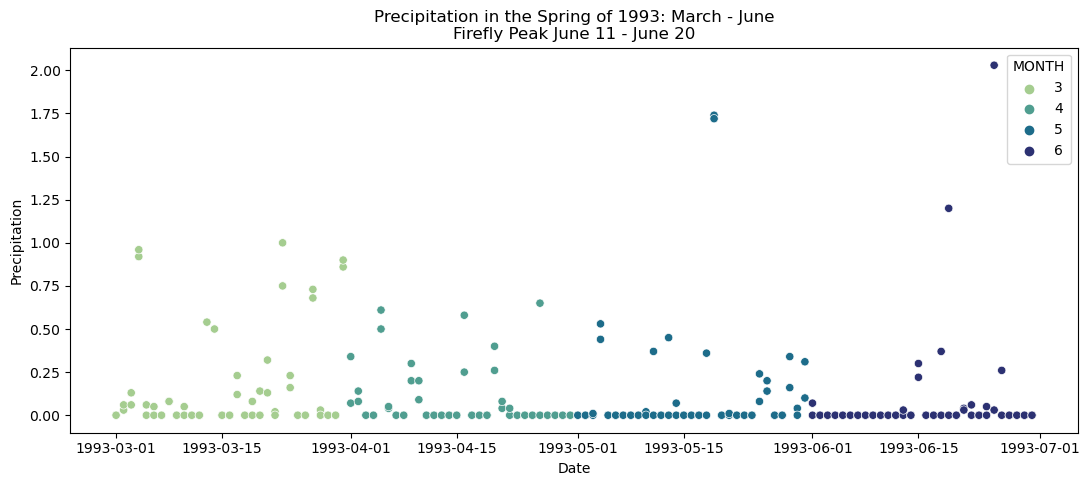

In [502]:
plt.figure(figsize=(13, 5))
sns.scatterplot(data=spring93, x="DATE", y="PRCP", hue="MONTH", palette ="crest")

plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.title("Precipitation in the Spring of 1993: March - June\nFirefly Peak June 11 - June 20")

Text(0.5, 1.0, 'Precipitation in the Spring of 2003: March - June\nFirefly Peak May 28 - June 9')

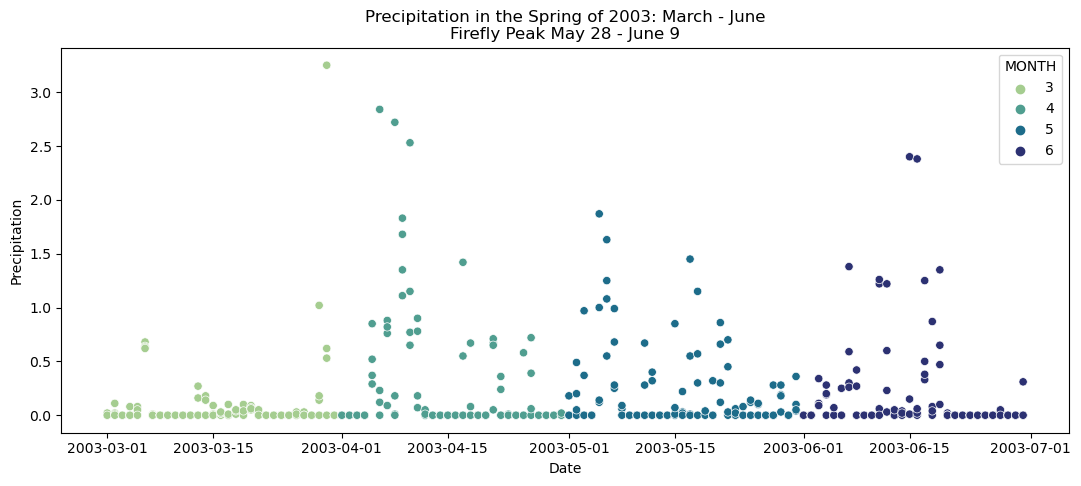

In [414]:
plt.figure(figsize=(13, 5))
sns.scatterplot(data=spring_03, x="DATE", y="PRCP", hue="MONTH", palette ="crest")

plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.title("Precipitation in the Spring of 2003: March - June\nFirefly Peak May 28 - June 9")

In [346]:
fireflies.query('YEAR == 1993')
fireflies.query('YEAR == 2003')

,YEAR,START_MONTH,START_DAY,END_MONTH,END_DAY,LENGTH,START_DOY,END_DOY
12,2003,5,28,6,9,13,148,160


### It does seem like the region got more precipitation in the Spring of 2003, both in amounts and in days of rainfall and consistently throughout the spring season. Perhaps this is a factor encouraging the fireflies to move along their development.

---
## Question: Does "start date" correlate with season length?

In [323]:
fireflies.groupby("START_DOY")["LENGTH"].describe()

,count,mean,std,min,25%,50%,75%,max
START_DOY,,,,,,,,
148,1.0,13.000000,NaN,13.0,13.00,13.0,13.00,13.0
150,3.0,7.333333,1.154701,6.0,7.00,8.0,8.00,8.0
151,1.0,6.000000,NaN,6.0,6.00,6.0,6.00,6.0
152,3.0,7.333333,1.154701,6.0,7.00,8.0,8.00,8.0
153,3.0,9.333333,1.527525,8.0,8.50,9.0,10.00,11.0
154,2.0,6.500000,2.121320,5.0,5.75,6.5,7.25,8.0
155,2.0,9.000000,1.414214,8.0,8.50,9.0,9.50,10.0
156,1.0,8.000000,NaN,8.0,8.00,8.0,8.00,8.0
157,1.0,10.000000,NaN,10.0,10.00,10.0,10.00,10.0


Text(0, 0.5, 'Length of Peak Season (Days)')

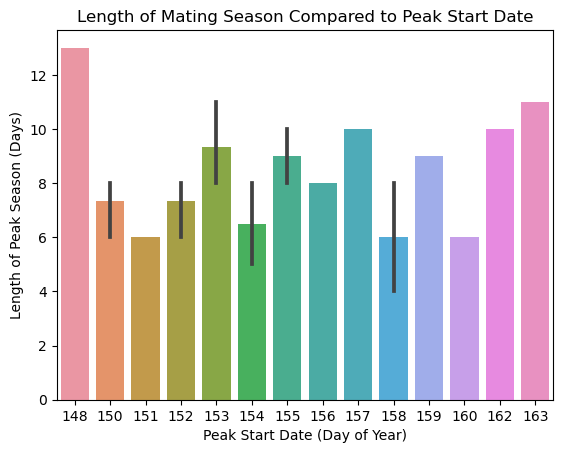

In [327]:
sns.barplot(data=fireflies, x="START_DOY", y="LENGTH")
plt.title("Length of Mating Season Compared to Peak Start Date")
plt.xlabel("Peak Start Date (Day of Year)")
plt.ylabel("Length of Peak Season (Days)")

It doesn't seem like the start date has any impact on the length of the season. This is clear from the visualization, as well as the standard deviation from seasons that happen to have the same start date.

---

## Question: Comparing the short season of 1999 and the long season of 2003:
- What was the rainfall in May & June these years?
- What was the daily average temperature?
- Anything to explain the difference in length?<br><br>

In [379]:
# rainfall in May and June of 1993
latespring_93 = ds.query('YEAR == 1993')
latespring_93 = latespring_93.query('MONTH == [5,6]')

Text(0.5, 1.0, 'Precipitation in May, June 1993\nPeak Mating Range: 10 days')

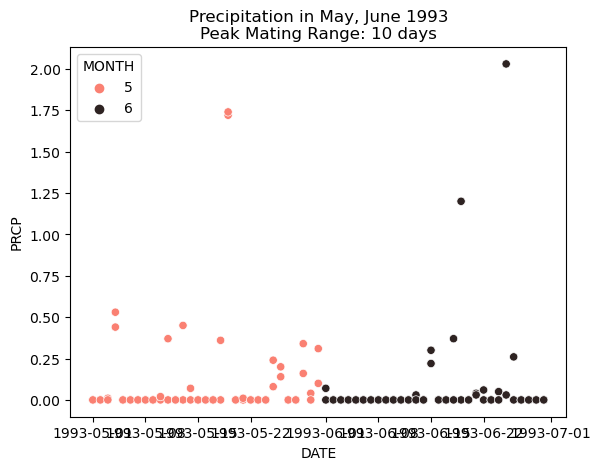

In [504]:
sns.scatterplot(data=latespring_93, x="DATE", y="PRCP", hue="MONTH", palette ="dark:salmon_r")
plt.title("Precipitation in May, June 1993\nPeak Mating Range: 10 days")

In [503]:
fireflies.query("YEAR == 1993")['LENGTH']

22    10
Name: LENGTH, dtype: int64

In [380]:
latespring_93['PRCP'].describe()

count    122.000000
mean       0.098525
std        0.315473
min        0.000000
25%        0.000000
50%        0.000000
75%        0.017500
max        2.030000
Name: PRCP, dtype: float64

In [470]:
# rainfall in May and June of 2003
latespring_03 = ds.query('YEAR == 2003')
latespring_03 = latespring_03.query('MONTH == [5,6]')

Text(0.5, 1.0, 'Precipitation in May, June 2003\nPeak Mating Range: 13 days')

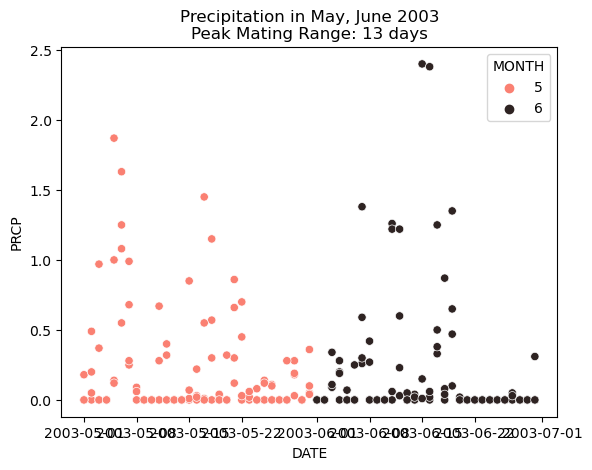

In [506]:
sns.scatterplot(data=latespring_03, x="DATE", y="PRCP", hue="MONTH", palette ="dark:salmon_r")
plt.title("Precipitation in May, June 2003\nPeak Mating Range: 13 days")

In [505]:
fireflies.query("YEAR == 2003")['LENGTH']

12    13
Name: LENGTH, dtype: int64

A LOT more rain in 2003 vs 1993! This could definitely be a factor in the varying peak mating season length.

---
## Question: Current firefly peak date estimations use degree days, which is a comparsion of the measurement vs. the average set point for that location. Degree Day base starting March 1 is 45F. How many days in April were above 45F for each year? Does this correlate at all with START date?

Let's pick 2 different years with different start dates as an initial evaluation. Season 2017 & 2019 had start dates of May 30th. Season 2018 had a start date of June 6th. Let's look at these 3 years.

In [390]:
fireflies.query('YEAR ==(2017,2018,2019)')

,YEAR,START_MONTH,START_DAY,END_MONTH,END_DAY,LENGTH,START_DOY,END_DOY
4,2019,5,30,6,6,8,150,157
5,2018,6,7,6,14,8,158,165
6,2017,5,30,6,6,8,150,157


In [392]:
years_789 = ds_date.query('YEAR ==(2017,2018,2019)')

In [509]:
# looking at average of average temp measurements per month in 2017-2019
# did this in 3 different tables because it didn't fit in the cell with all 3!
years_789.groupby('YEAR')[['TAVG']].describe()

TAVG                                                    
      count       mean        std   min   25%   50%   75%   max
YEAR                                                           
2017  361.0  59.930748  14.693845  17.0  49.0  63.0  73.0  84.0
2018  365.0  58.961644  16.969386  15.0  46.0  60.0  75.0  83.0
2019  364.0  60.186813  15.630134  20.0  46.0  63.0  75.0  83.0

In [405]:
# looking at average of min temp measurements per month in 2017-2019
years_789.groupby('YEAR')[('TMIN')].describe()

,count,mean,std,min,25%,50%,75%,max
YEAR,,,,,,,,
2017,1052.0,49.673004,14.772603,8.0,38.0,52.0,62.0,76.0
2018,1051.0,49.483349,17.259930,3.0,36.0,51.0,66.0,76.0
2019,1036.0,49.861004,15.584769,9.0,37.0,51.0,65.0,74.0


In [406]:
# looking at average of max temp measurements per month in 2017-2019
years_789.groupby('YEAR')[('TMAX')].describe()

,count,mean,std,min,25%,50%,75%,max
YEAR,,,,,,,,
2017,1052.0,70.190114,15.778979,21.0,59.0,74.0,83.0,96.0
2018,1051.0,68.421503,17.912599,18.0,55.0,71.0,85.0,94.0
2019,1036.0,70.422780,16.839361,25.0,56.0,73.0,86.0,97.0


Full year data doesn't show many differences between the years as a whole. As we see in the visualization below, it's a little meaningless to consider so much of the year. And from the above questions and research, it's clear that it makes sense to zoom in and study just the months surrounding the mating seasons. Next step is to pare this data down so that it focuses only on April of 2017-2019.

Text(0.5, 1.0, 'Minimum Daily Temperature Measurements from 2017 - 2019')

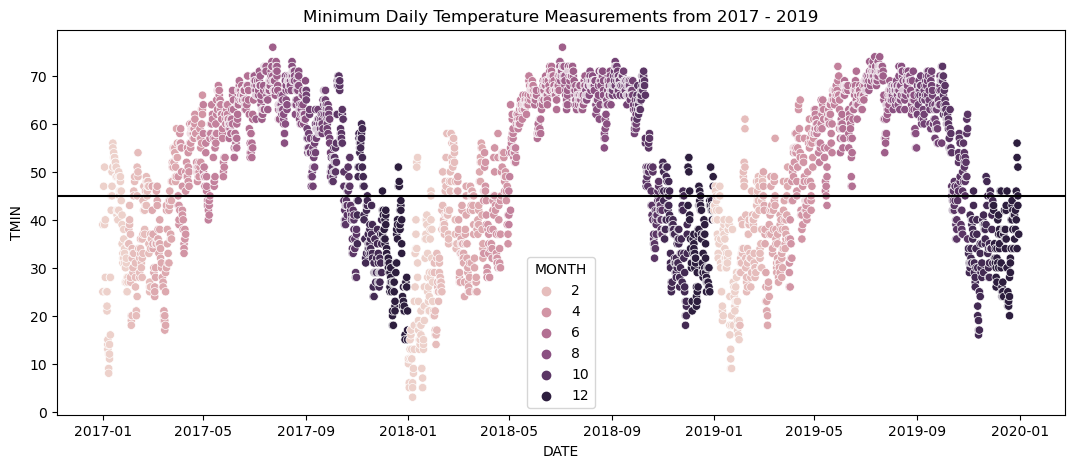

In [441]:
plt.figure(figsize=(13, 5))
sns.scatterplot(data=years_789, x="DATE", y="TMIN", hue="MONTH")
plt.axhline(y=45, color="black")


plt.title("Minimum Daily Temperature Measurements from 2017 - 2019")

Text(0.5, 1.0, 'Minimum Daily Temperature Measurements from 2017 - 2019')

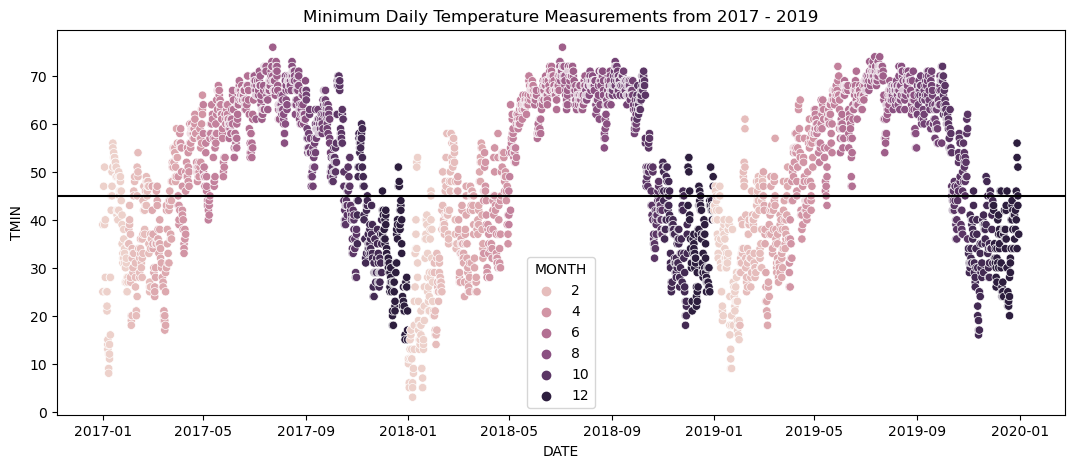

In [442]:
plt.figure(figsize=(13, 5))
sns.scatterplot(data=years_789, x="DATE", y="TMIN", hue="MONTH")
plt.axhline(y=45, color="black")

plt.title("Minimum Daily Temperature Measurements from 2017 - 2019")

(These visualizations aren't really meaningful or significant, but I think they end up being a really cool way to see the movement in temperatures through out a 3 year span. And I just think they look really pretty!)

In [443]:
# breaking down data for 2017-2019 so that we're only looking at the month of april
april_years_789 = years_789.query("MONTH == 4")

Text(0.5, 1.0, 'Minimum Daily Temperature Measurements in April 2017 - 2019')

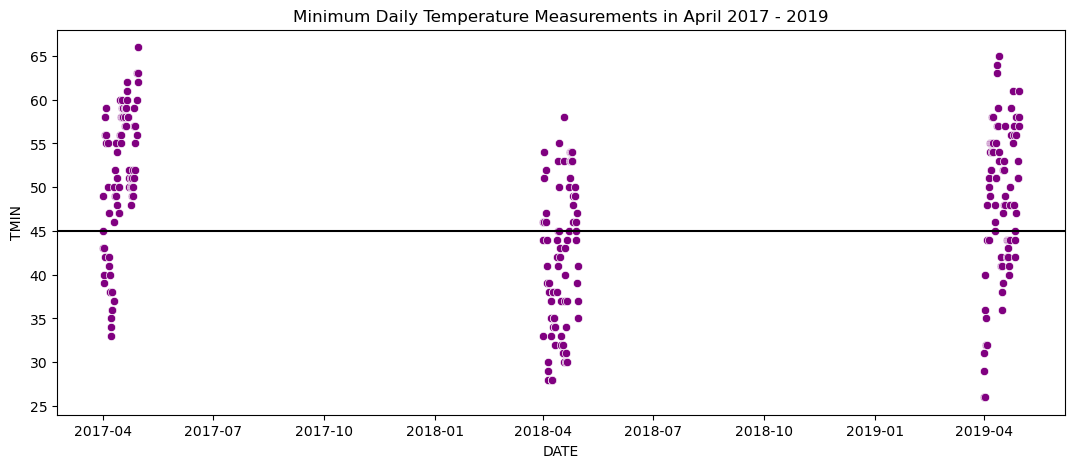

In [463]:
plt.figure(figsize=(13, 5))
sns.scatterplot(data=april_years_789, x="DATE", y="TMIN", color="purple")
plt.axhline(y=45, color="black")

plt.title("Minimum Daily Temperature Measurements in April 2017 - 2019")

In [483]:
april_years_789.query('TMIN > 45').groupby("YEAR").count()["DAY"]

YEAR
2017    71
2018    30
2019    54
Name: DAY, dtype: int64

### Wow, big differences in minimum temperature counts above 45 in April of each year. Perhaps it's better to focus on variations in minimums - generally warmer days in April might lead to earlier transition from larva to pupa to adult which kicks of the peak season earlier.

In [448]:
april_years_789.groupby("YEAR")['TMIN'].describe()

,count,mean,std,min,25%,50%,75%,max
YEAR,,,,,,,,
2017,89.0,51.584270,7.841917,33.0,48.00,52.0,58.0,66.0
2018,85.0,41.600000,8.304044,28.0,34.00,42.0,49.0,58.0
2019,86.0,48.325581,8.827020,26.0,42.25,49.5,55.0,65.0


In [468]:
april_years_789.groupby("YEAR")['TAVG'].describe()

,count,mean,std,min,25%,50%,75%,max
YEAR,,,,,,,,
2017,30.0,62.833333,7.090953,47.0,59.50,64.0,67.00,76.0
2018,30.0,54.533333,7.842120,39.0,49.25,56.0,59.00,69.0
2019,30.0,60.966667,8.185283,40.0,58.50,62.5,66.75,72.0


In [449]:
april_years_789.groupby("YEAR")['TMAX'].describe()

,count,mean,std,min,25%,50%,75%,max
YEAR,,,,,,,,
2017,89.0,74.224719,9.236480,47.0,68.00,76.0,81.0,93.0
2018,85.0,65.270588,10.038483,42.0,60.00,66.0,73.0,83.0
2019,86.0,72.232558,9.688895,48.0,67.25,75.0,79.0,86.0


Text(0.5, 1.0, 'Average Daily Temperature Measurements in April 2017 - 2019')

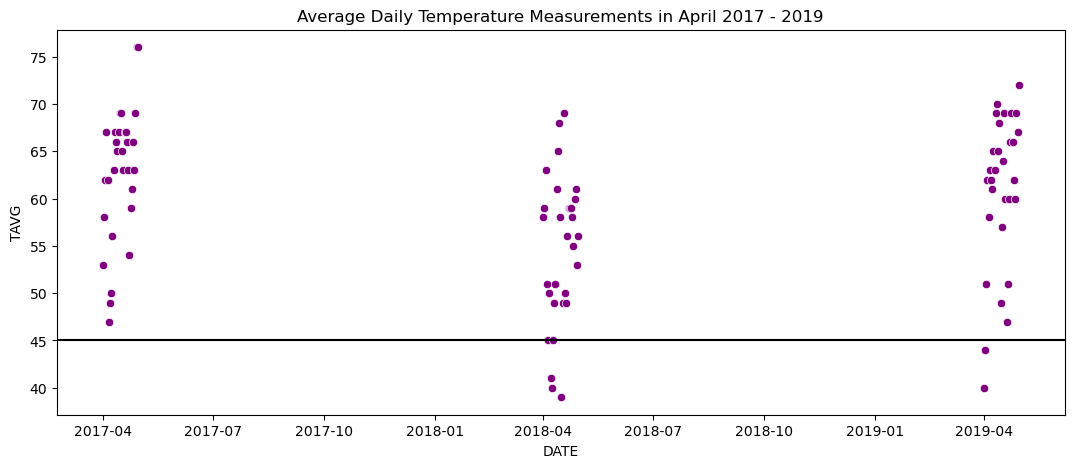

In [466]:
plt.figure(figsize=(13, 5))
sns.scatterplot(data=april_years_789, x="DATE", y="TAVG", color="purple")
plt.axhline(y=45, color="black")

plt.title("Average Daily Temperature Measurements in April 2017 - 2019")

Text(0.5, 1.0, 'Maximum Daily Temperature Measurements in April 2017 - 2019')

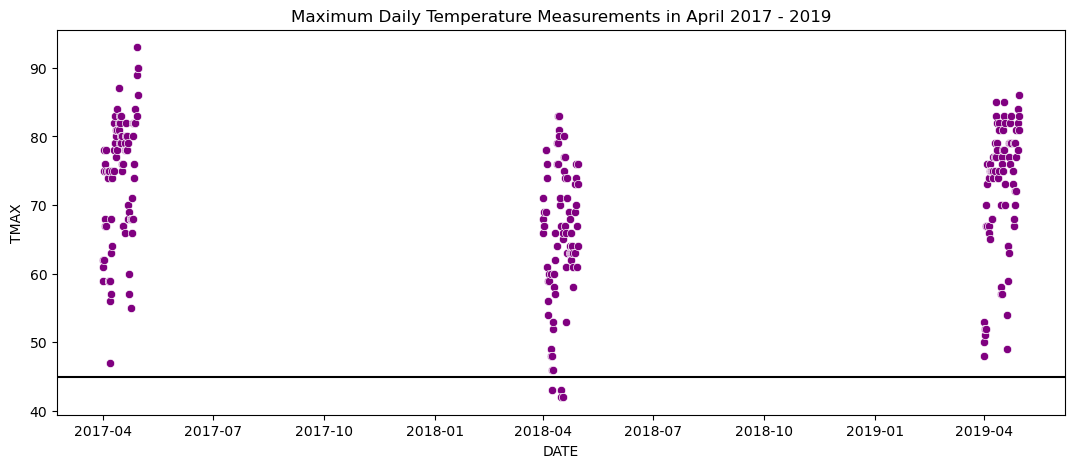

In [467]:
plt.figure(figsize=(13, 5))
sns.scatterplot(data=april_years_789, x="DATE", y="TMAX", color="purple")
plt.axhline(y=45, color="black")

plt.title("Maximum Daily Temperature Measurements in April 2017 - 2019")

Interesting! It seems like visually we see the variation in **minimum** temperature distributions in April between the 2017 & 2019 seasons vs 2018. When numerically examining the data, we see an average **maximum** and **average** temperature relationship between 2017 & 2019 vs 2018. 